In [1]:
from src.models.decisiontrees.xgboost import XGB1
from src.models.decisiontrees.catboost import CatBoost1
from src.models.decisiontrees.lightgbm import LGBM1
from utils import get_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
len_week =24*7

In [3]:
X,y,times = get_data('ES',indices=[114],demand=[0]+[i for i in range(1,8000,6)]+[i for i in range(6300,6400 )]+[i for i in range(8700,8800)],temp=[0, 1, 24, 24*7, 24*365],spv=[0, 1, 24, 24*7, 24*365],rollout_values=[-i for i in range(25)],n_futures=4)

/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

In [4]:
times

[8799    2023-01-02 16:00:00
 8800    2023-01-02 17:00:00
 8801    2023-01-02 18:00:00
 8802    2023-01-02 19:00:00
 8803    2023-01-02 20:00:00
                 ...        
 22621   2024-07-31 16:00:00
 22622   2024-07-31 17:00:00
 22623   2024-07-31 18:00:00
 22624   2024-07-31 19:00:00
 22625   2024-07-31 20:00:00
 Name: DATETIME, Length: 13827, dtype: datetime64[ns]]

In [5]:
X_train = X[0][:-800]
y_train = y[0][:-800]
X_test = X[0][-800:]
y_test = y[0][-800:]
times_train = times[0][:-800]
times_test = times[0][-800:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(times_train.shape)
print(times_test.shape)

(13027, 1557)
(13027, 4)
(800, 1557)
(800, 4)
(13027,)
(800,)


In [6]:
model = XGB1()
model2 = CatBoost1(loss_function='MultiRMSE',task_type='GPU', devices='0:1:2:3')
model3 = LGBM1()

In [7]:
# model.fit(X_train, y_train)
# model3.fit(X_train, y_train)
model3.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396084
[LightGBM] [Info] Number of data points in the train set: 13027, number of used features: 1557
[LightGBM] [Info] Start training from score 3.006847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396084
[LightGBM] [Info] Number of data points in the train set: 13027, number of used features: 1557
[LightGBM] [Info] Start training from score 3.006898
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.124335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396084
[LightGBM] [Info] Number of data points in the train set: 13027, number of used features: 1557
[LightGBM] [Inf

/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  war

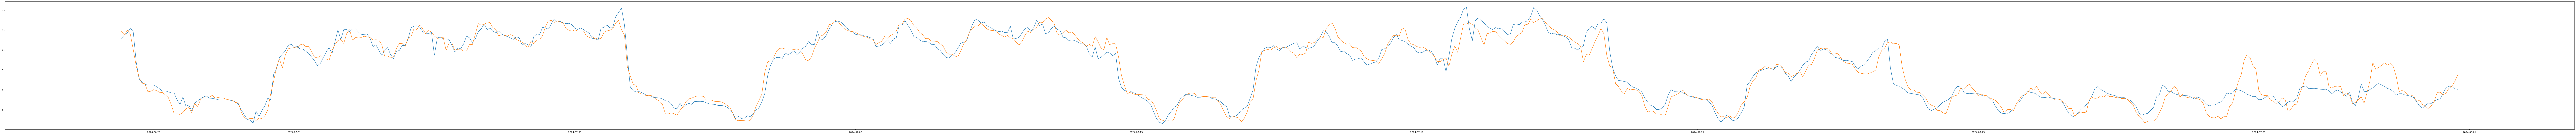

In [8]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,-1], label='Real')
plt.plot(times_test, model3.predict(X_test)[:,-1], label='CatBoost')

/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  war

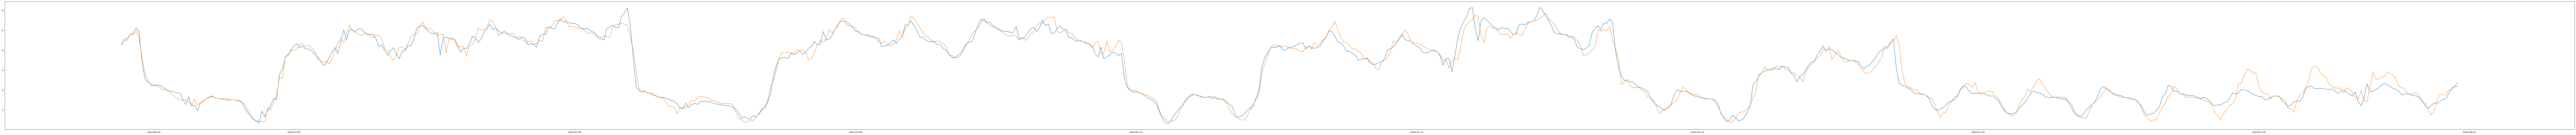

In [9]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,1],label='Real')
plt.plot(times_test,model3.predict(X_test)[:,1], label='CatBoost')

/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  war

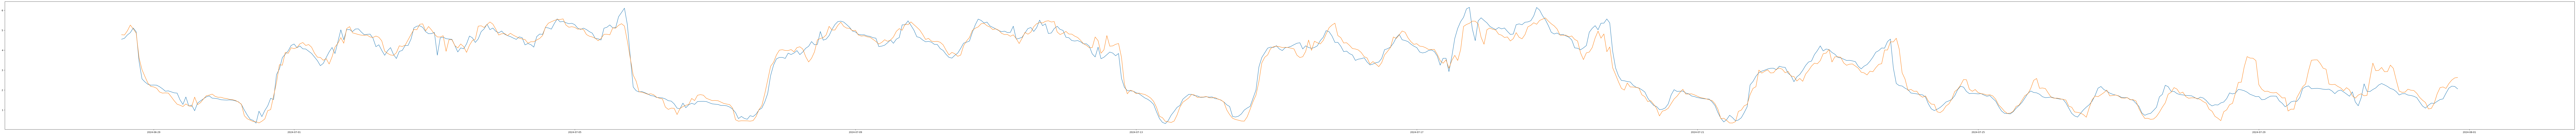

In [10]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,2],label='Real')
plt.plot(times_test,model3.predict(X_test)[:,2], label='CatBoost')

/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  war

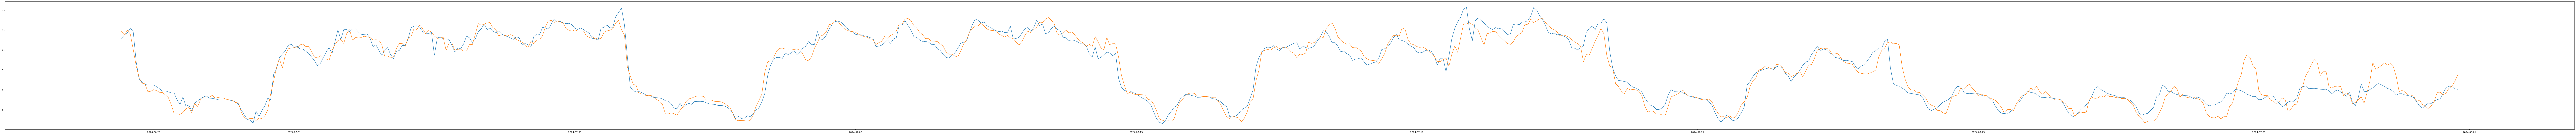

In [11]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,3],label='Real')
plt.plot(times_test,model3.predict(X_test)[:,3], label='CatBoost')

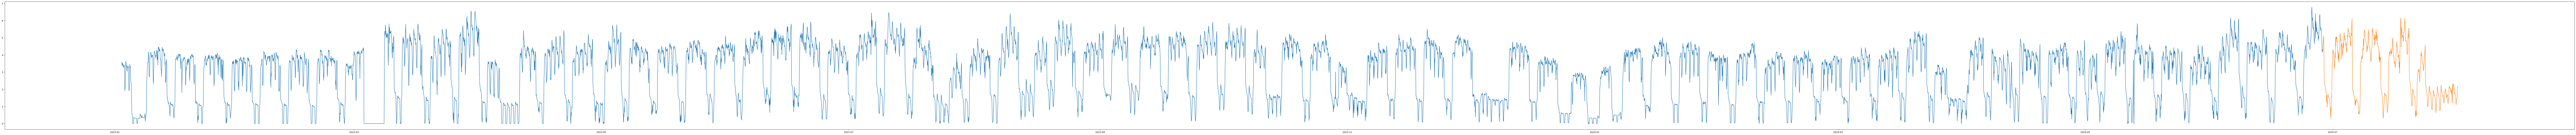

In [12]:
plt.figure(figsize=(200, 10))
plt.plot(times_train, y_train[:,0], label='Real')
plt.plot(times_test, y_test[:,0], label='CatBoost')